The cython version of the curve counter is not available.


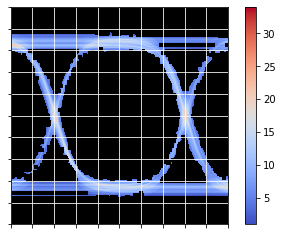

In [1]:
import numpy as np
use_fast = True
try:
    from brescount import bres_curve_count
except ImportError:
    print ("The cython version of the curve counter is not available.")
    use_fast = False
def bres_segment_count_slow(x0, y0, x1, y1, grid):
    """Bresenham's algorithm.

    The value of grid[x,y] is incremented for each x,y
    in the line from (x0,y0) up to but not including (x1, y1).
    """
    nrows, ncols = grid.shape
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 0
    if x0 < x1:
        sx = 1
    else:
        sx = -1
    sy = 0
    if y0 < y1:
        sy = 1
    else:
        sy = -1
    err = dx - dy
    while True:
        if x0 == x1 and y0 == y1:
            break
        if 0 <= x0 < nrows and 0 <= y0 < ncols:
            grid[x0, y0] += 1
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy
def bres_curve_count_slow(x, y, grid):
    for k in range(x.size - 1):
        x0 = x[k]
        y0 = y[k]
        x1 = x[k+1]
        y1 = y[k+1]
        bres_segment_count_slow(x0, y0, x1, y1, grid)
def random_trace(t):
    s = 2*(np.random.randint(0, 5) % 2) - 1
    r = 0.01 * np.random.randn()
    s += r
    a = 2.0 + 0.001 * np.random.randn()
    q = 2*(np.random.randint(0, 7) % 2) - 1
    t2 = t + q*(6 + 0.01*np.random.randn())
    t2 += 0.05*np.random.randn()*t
    y = a * (np.exp(s*t2) / (1 + np.exp(s*t2)) - 0.5) + 0.07*np.random.randn()
    return y
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    grid_size = 600
    grid = np.zeros((grid_size, grid_size), dtype=np.int32)
    tmin = -10.0
    tmax = 10.0
    n = 81
    t = np.linspace(tmin, tmax, n)
    dt = (tmax - tmin) / (n - 1)
    ymin = -1.5
    ymax = 1.5
    num_traces = 1000
    for k in range(num_traces):
        steps = dt + np.sqrt(0.01 * dt) * np.random.randn(n)
        steps[0] = 0
        steps_sum = steps.cumsum()
        t2 = tmin + (tmax - tmin) * steps_sum / steps_sum[-1]
        td = (((t2 - tmin) / (tmax - tmin)) * grid_size).astype(np.int32)
        y = random_trace(t2)
        yd = (((y - ymin) / (ymax - ymin)) * grid_size).astype(np.int32)
        if use_fast:
            bres_curve_count(td, yd, grid)
        else:
            bres_curve_count_slow(td, yd, grid)
    plt.figure()
    grid = grid.astype(np.float32)
    grid[grid==0] = np.nan
    plt.grid(color='w')
    plt.imshow(grid.T[::-1,:], extent=[0,1,0,1], cmap=plt.cm.coolwarm,
               interpolation='gaussian')
    ax = plt.gca()
    ax.set_facecolor('k')
    ax.set_xticks(np.linspace(0,1,11))
    ax.set_yticks(np.linspace(0,1,11))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.colorbar()
    fig = plt.gcf()
    plt.show()